In [1]:
import uproot	
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import awkward as ak
from scipy.optimize import curve_fit
from methods.fit_linear_regression_model import fit_linear_regression_model
import sklearn
%matplotlib inline

In [2]:
file = uproot.open(
    "tracking_losses_ntuple_B_EndVeloP.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1"
)

# selektiere nur elektronen von B->K*ee
allcolumns = file.arrays()
found = allcolumns[
    (allcolumns.isElectron) & (~allcolumns.lost) & (allcolumns.fromB)
]  # B: 9056
lost = allcolumns[
    (allcolumns.isElectron) & (allcolumns.lost) & (allcolumns.fromB)
]  # B: 1466

notelectrons = allcolumns[
    (~allcolumns.isElectron) & (allcolumns.fromB) & (~allcolumns.lost)
]

print(ak.num(found, axis=0), ak.num(lost, axis=0))
print(ak.num(notelectrons, axis=0))
# ak.count(found, axis=None)

41978 8523
92337


In [3]:
rad_length_found = ak.to_numpy(found["rad_length_frac"])
eta_found = ak.to_numpy(found["eta"])
rad_length_lost = ak.to_numpy(lost["rad_length_frac"])
eta_lost = ak.to_numpy(lost["eta"])

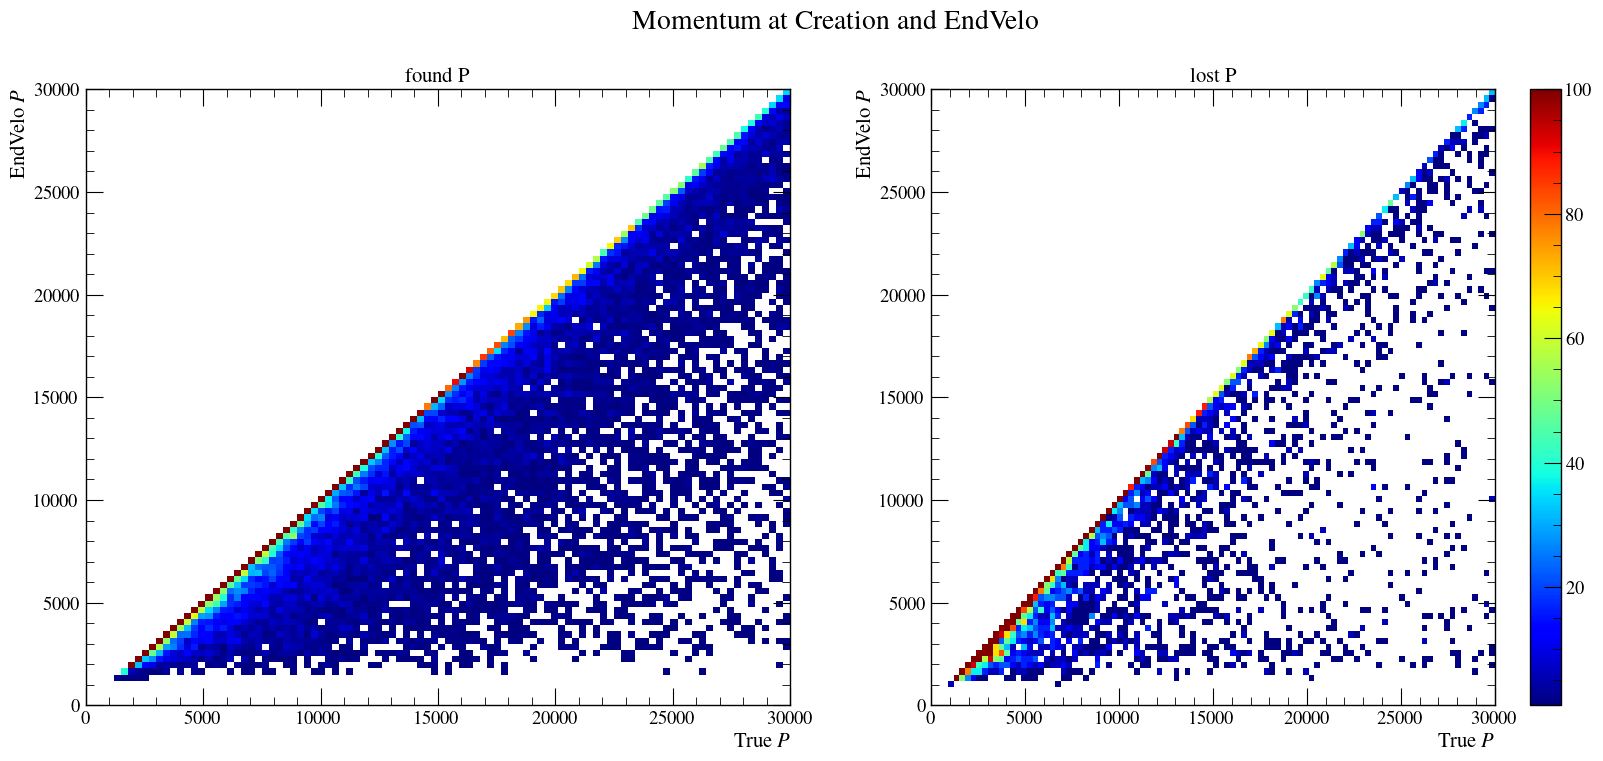

In [11]:
endVeloP_found = ak.to_numpy(found["ideal_state_770_p"])
trueP_found = ak.to_numpy(found["p"])

endVeloP_lost = ak.to_numpy(lost["ideal_state_770_p"])
trueP_lost = ak.to_numpy(lost["p"])

endVeloP_notelectrons = ak.to_numpy(notelectrons["ideal_state_770_p"])
trueP_notelectrons = ak.to_numpy(notelectrons["p"])

stretch_factor = ak.num(trueP_lost, axis=0) / ak.num(trueP_found, axis=0)

nbins = 100
vmax = 100

fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

a0 = ax0.hist2d(
    trueP_found,
    endVeloP_found,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax,
    range=[[0, 30000], [0, 30000]],
)
ax0.set_xlabel(f"True $P$")
ax0.set_ylabel(f"EndVelo $P$")
ax0.set_title(f"found P")

a1 = ax1.hist2d(
    # trueP_notelectrons,
    # endVeloP_notelectrons,
    trueP_lost,
    endVeloP_lost,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax * stretch_factor,
    range=[[0, 30000], [0, 30000]],
)
ax1.set_xlabel(f"True $P$")
ax1.set_ylabel(f"EndVelo $P$")
ax1.set_title(f"lost P")

plt.suptitle("Momentum at Creation and EndVelo")
plt.colorbar(a0[3], ax=ax1)
plt.show()

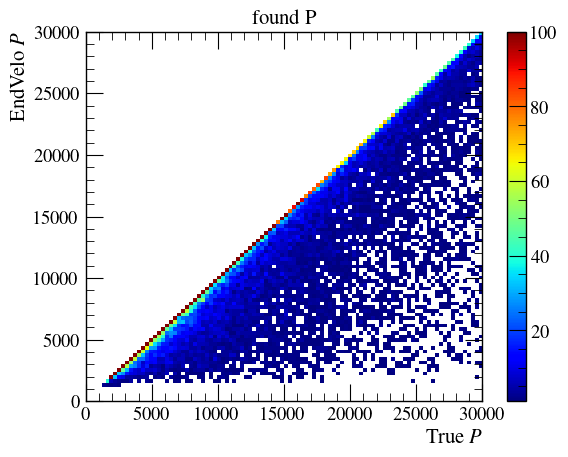

In [12]:
a0 = plt.hist2d(
    trueP_found,
    endVeloP_found,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax,
    range=[[0, 30000], [0, 30000]],
)
plt.xlabel(f"True $P$")
plt.ylabel(f"EndVelo $P$")
plt.title(f"found P")
plt.colorbar(a0[3])
plt.show()